# Visualise the random GSR raw data
First we visualize the list including all random GSR raw data stored in "eda_signals" list.
20 different EDA signals with sample rate of 250 with duration of 10 seconds. (size of list: 20 item with length of 2500 each)

[array([0.99788875, 0.99791173, 0.99790225, ..., 2.41614557, 2.41018055,
       2.40427158]), array([1.01349388, 1.01347954, 1.01336015, ..., 2.10845936, 2.10457421,
       2.10068955]), array([1.00160421, 1.00165555, 1.00172889, ..., 2.30466752, 2.29999211,
       2.29519113]), array([0.99551765, 0.99556447, 0.99562397, ..., 2.3673548 , 2.36096327,
       2.35462749]), array([1.00300461, 1.00309038, 1.00326275, ..., 2.21641778, 2.2116888 ,
       2.20699479]), array([0.99884373, 0.99885445, 0.99880998, ..., 1.62938513, 1.62777988,
       1.62620904]), array([1.00157543, 1.00156187, 1.00144749, ..., 2.07630445, 2.07251311,
       2.06874286]), array([0.98898952, 0.98907283, 0.9892391 , ..., 2.2651361 , 2.26030227,
       2.25551334]), array([1.00162299, 1.00165728, 1.00168017, ..., 1.57030997, 1.56902293,
       1.56769941]), array([0.9952017 , 0.99526053, 0.99535532, ..., 2.48149712, 2.47449872,
       2.46752639]), array([0.99722989, 0.99727296, 0.99732201, ..., 2.22301822, 2.2184852

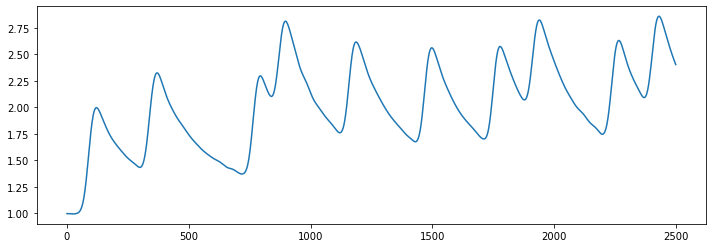

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Visualise the list of signals
print(eda_signals)
print(np.array(eda_signals).shape)

# Visualise one of the signals in the list
plt.figure(figsize=(12,4))
plt.plot(eda_signals[0])

# Import the pyEDA library
In order to use pyEDA for statistical feature extraction, we need to import it in our code after cloning the repository in the same directory as our code.

In [6]:
from pyEDA.main import *

# Train the autoencoder
In order to extract automatic features from our gsr signal, we need to train our autoencoder using our gs signals using the prepare_automatic function.

NOTE: If you need to process faster, you can downsample the signal. But remember if you downsample the signal, the size of GSR signals which autoencoder is being trained with is going to also change.

In [9]:
prepare_automatic(eda_signals, sample_rate=250, new_sample_rate=250, k=32, epochs=100, batch_size=10)

If you are using this tool for your research please cite this paper: "GSR Analysis for Stress: Development and Validation of an Open Source Tool for Noisy Naturalistic GSR Data"
epoch : 1/100, loss = 2.802090
epoch : 2/100, loss = 0.460173
epoch : 3/100, loss = 1.250345
epoch : 4/100, loss = 0.448691
epoch : 5/100, loss = 0.634804
epoch : 6/100, loss = 0.268244
epoch : 7/100, loss = 0.176262
epoch : 8/100, loss = 0.169627
epoch : 9/100, loss = 0.140845
epoch : 10/100, loss = 0.141272
epoch : 11/100, loss = 0.151228
epoch : 12/100, loss = 0.138227
epoch : 13/100, loss = 0.115393
epoch : 14/100, loss = 0.115849
epoch : 15/100, loss = 0.124378
epoch : 16/100, loss = 0.114096
epoch : 17/100, loss = 0.105679
epoch : 18/100, loss = 0.109966
epoch : 19/100, loss = 0.109611
epoch : 20/100, loss = 0.103991
epoch : 21/100, loss = 0.104039
epoch : 22/100, loss = 0.105153
epoch : 23/100, loss = 0.103055
epoch : 24/100, loss = 0.102282
epoch : 25/100, loss = 0.102315
epoch : 26/100, loss = 0.101455

# Feature Extraction
After our autoencoder is trained, we use the following function in order to extract automatic features from any GSR signal using process_automatic function. 

NOTE: the size of gsr signals here should be equal to the size of GSR signals which the autoencoder were being trained by. (The same window size for entire study)
If another window size is needed to be used, autoencoder needs to be retrained using new list of GSR signals with that size.

Example: Here each of our GSR signals in our eda_signals list has the length of 2500. Therefore, if we dont downsample the signal we need to call process_automatic function with eda signals with the length of 2500. 
However, if we downsample the signal to 40 for example. We need to call process_automatic function with GSR signals with the length of 2500*40/250 = 400.

In [10]:
automatic_features = process_automatic(eda_signals[0])

In [11]:
print(automatic_features)

[ 2.1938908  -3.3337872  -0.59538203 -1.1390333   1.4525739   1.302319
 -2.3032336  -0.2162954   1.402661   -0.9634922  -3.0058932  -1.1702341
 -1.2339394   1.248246    0.04604254 -0.36458677 -1.0588155   2.55221
 -0.06742256  2.637837    0.07761233  0.0241823  -0.52685773  0.29004225
  3.5780683  -1.5817611   1.2679836   0.7586949   3.0091262   0.6436667
  2.379496   -2.8622315 ]
